# SIMPLE LINEAR REGRESSION
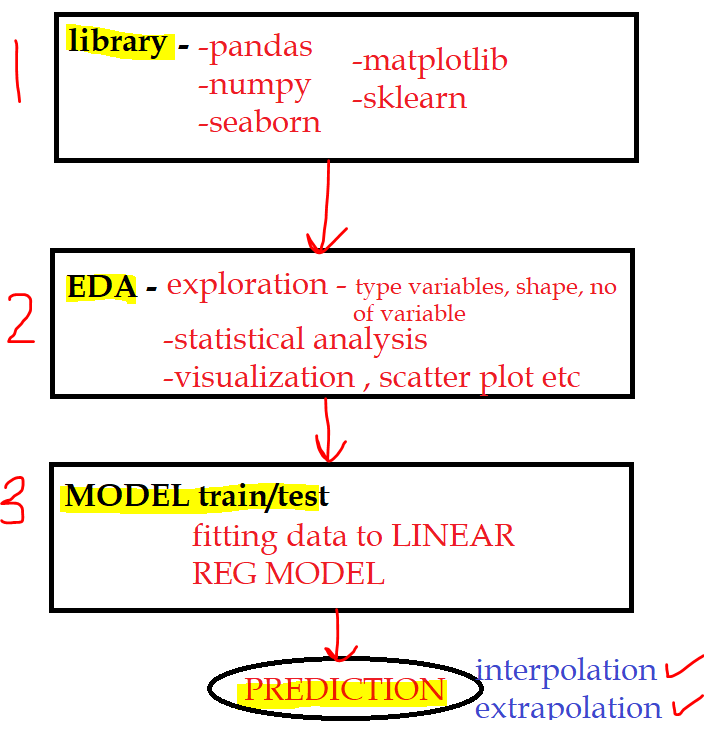

In [1]:
#IMPORT LIBRARY
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')
import statsmodels.formula.api as smf




# CASE STUDY 1 - DELIVERY TIME PREDICTION

In [2]:
#loading data
delivery=pd.read_csv("delivery_time.csv")
delivery.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


EDA
1. no of variable
2. determining dependent and independent variable as per case- study requirments
3. visualization - to determine the relationship between variables
4. data cleaning - null outliers (measure of good fit)



In [3]:
# shape and size of data
print("no of rows =",delivery.shape[0])
print("no of variables = ",delivery.shape[1])

no of rows = 21
no of variables =  2


In [4]:
# CHECK FOR ANY NULL VALUE
delivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 468.0 bytes


In [5]:
#zero null value

#STATISTICAL ANALYSIS
delivery.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [6]:
#COLINEAR RELATIONSHIP
delivery.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


<Axes: >

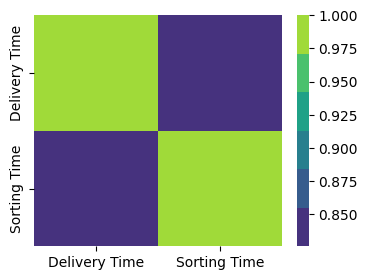

In [7]:
 #CORRELATION MATRIX
 plt.figure(figsize=(4, 3))
 cmap= sns.color_palette("viridis")
 sns.heatmap(delivery.corr(),cmap=cmap)

<Axes: xlabel='Sorting Time', ylabel='Delivery Time'>

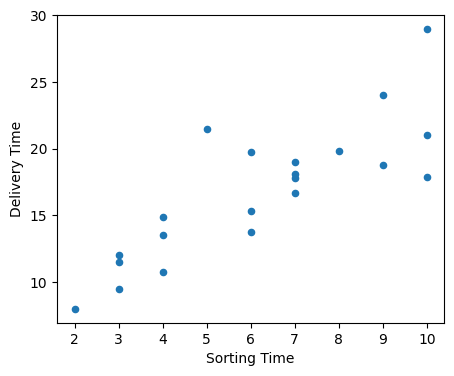

In [8]:
#scatter plot
delivery.plot(kind="scatter",x="Sorting Time",y="Delivery Time",figsize=(5, 4))

In [9]:
#VARIABLES
x=delivery['Sorting Time'].to_numpy()
y=delivery['Delivery Time'].to_numpy()

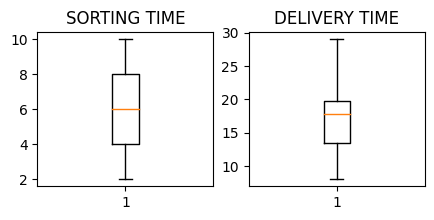

In [10]:
#boxplot
fig,axs=plt.subplots(nrows=1, ncols=2,figsize=(5,2))
axs[0].boxplot(x)
axs[1].boxplot(y)
axs[0].set_title('SORTING TIME')
axs[1].set_title('DELIVERY TIME')
plt.show()

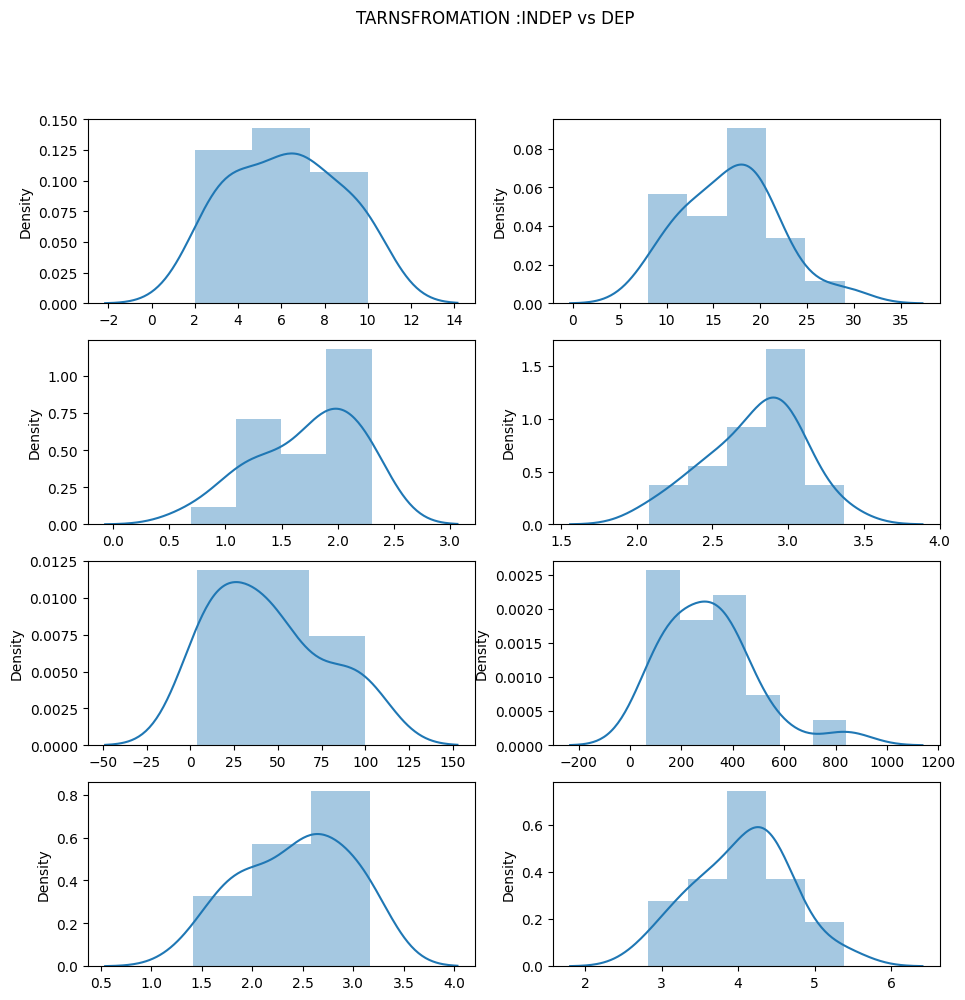

In [11]:
fig,ax=plt.subplots(nrows=4,ncols=2 ,figsize=(11,11))
sns.distplot(x,kde=True,ax=ax[0,0])
sns.distplot(y,kde=True,ax=ax[0,1])
sns.distplot(np.log(x),kde=True,ax=ax[1,0])
sns.distplot(np.log(y),kde=True,ax=ax[1,1])
sns.distplot(np.square(x),kde=True,ax=ax[2,0])
sns.distplot(np.square(y),kde=True,ax=ax[2,1])
sns.distplot(np.sqrt(x),kde=True,ax=ax[3,0])
sns.distplot(np.sqrt(y),kde=True,ax=ax[3,1])
plt.suptitle('TARNSFROMATION :INDEP vs DEP  ')
plt.show()

DISCOVERY
1. independent variable - SORTING TIME
2. dependent varibale - DELIVERY TIME
3. correlation is high ie: more than 80%

DATA PREPROCESS

- not spliting since data size is small (21 data point)




In [12]:
delivery1=delivery.rename({'Sorting Time':'S','Delivery Time':'D'},axis=1)

MODEL PREPARATION AND TRAINING

In [13]:
#MODEL
model=smf.ols("D~S",data=delivery1).fit()

In [14]:
#MODEL ANALYSIS
model.params

Intercept    6.582734
S            1.649020
dtype: float64

In [15]:
model.rsquared

0.6822714748417231

model analysis conclusion:

- as r2 < 85% 
- transfromation requared 
- which are log, square , sqrt


TRANSFORMATION AND RSQUARE ANALYSIS
- No tranformation
- LOG tranformation
- SQUARE 
- SUARE ROOT


In [16]:
data=delivery1
log_df=np.log(data)
square_df=np.square(data)
sqrt_df=np.sqrt(data)

In [17]:
#FITTING TRANSFORMED DATA INTO MODEL
model_log=smf.ols("D~S",data=log_df).fit()
model_square=smf.ols("D~S",data=square_df).fit()
model_sqrt=smf.ols("D~S",data=sqrt_df).fit()

In [18]:
df2={'Prep_Models':['Model','Square_Model','Sqrt_Model','Log_Model'],'Rsquared':[model.rsquared,model_square.rsquared,model_sqrt.rsquared,model_log.rsquared]}
rtable=pd.DataFrame(df2)
rtable


,Prep_Models,Rsquared
0,Model,0.682271
1,Square_Model,0.588188
2,Sqrt_Model,0.729201
3,Log_Model,0.772161


<BarContainer object of 4 artists>

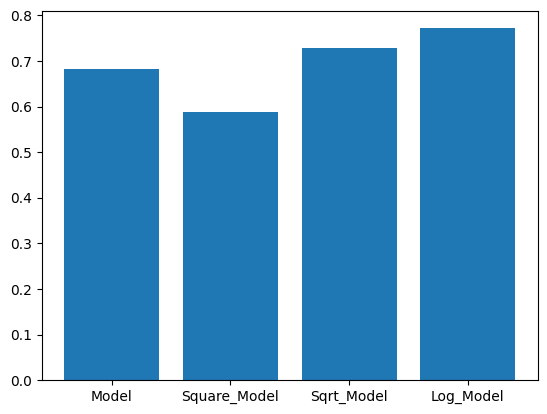

In [19]:

plt.bar(df2['Prep_Models'],df2['Rsquared'])

CONCLUSION 
- LOG TRANFORMATION GIVING BETTER ACCURACY THEN REST OF MODELS

<Axes: xlabel='S', ylabel='D'>

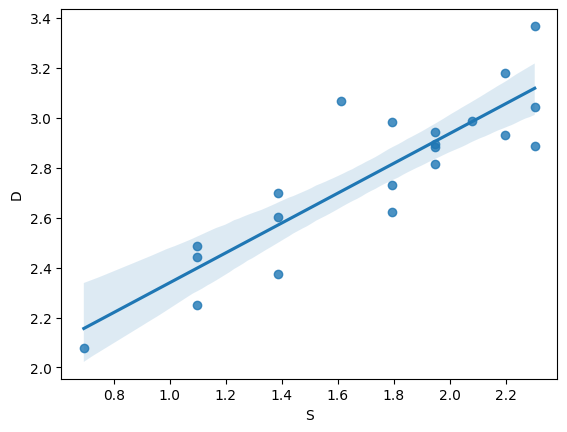

In [20]:
#visualizing regression
sns.regplot(y='D',x='S',data=log_df)


# CASE STUDY 2 - SALARY HIKE PREDICTION



In [21]:
#reading data
salary=pd.read_csv('Salary_Data.csv')

EDA AND ANALYSIS

In [22]:
#SHAPE AND SIZE
print(len(salary))
salary.shape

30


(30, 2)

2 variables
and total 30 data point

In [23]:
#NULL AND EMPTY ROWS
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [24]:
#STATISTICAL ANLYSIS
salary.describe()


,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


<Axes: xlabel='YearsExperience', ylabel='Salary'>

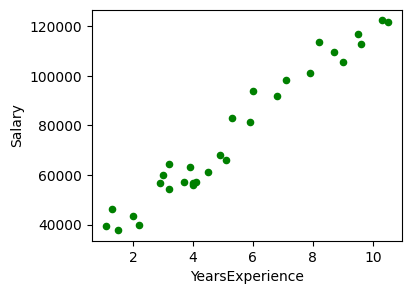

In [25]:
#visualizing
salary.plot(kind="scatter",x='YearsExperience',y='Salary',figsize=(4,3),color='green')

<Axes: >

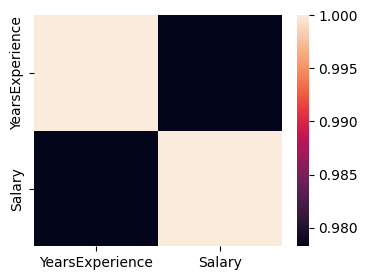

In [26]:
#correction
plt.figure(figsize=(4,3))
sns.heatmap(salary.corr())

In [27]:
#defining variables
x=salary['YearsExperience'].to_numpy()
y=salary['Salary'].to_numpy()

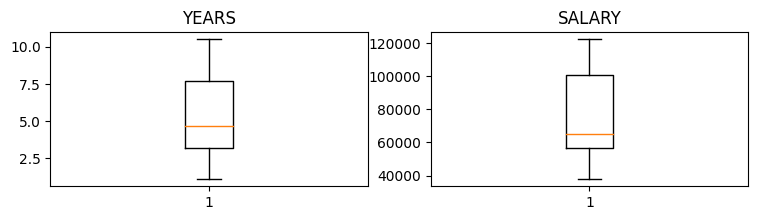

In [28]:
#boxplot
fig,axs = plt.subplots(nrows=1 ,ncols=2 ,figsize=(9,2))
axs[0].boxplot(x)
axs[1].boxplot(y)
axs[0].set_title('YEARS')
axs[1].set_title('SALARY')
plt.show()

analysis conclusion
1. independent variable - YEARS OF EXP
2. dependent variable - SALARY
3. no of data point - 30
4. highly correlated - 98% correlation


DATA PREPROCESSING

MODEL TRAINING

In [29]:
#BUILDING MODEL
model=smf.ols("Salary~YearsExperience",data=salary).fit()

In [30]:
#TRAINING analysis
model.params


Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [31]:
model.pvalues

Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64

In [32]:
# COFF OF DETERMINATION
model.rsquared

0.9569566641435086

MODEL ANALYSIS CONCLUSION:

- Statistically singnificant 
- rsqr > 95% 


Improoving accuracy/fit via transformation

- log
- square
- sqrt


In [33]:
data=salary
log_df=np.log(data)
square_df=np.square(data)
sqrt_df=np.sqrt(data)

In [34]:
#FITTING TRANSFORMED DATA INTO MODEL
model_log=smf.ols("Salary~YearsExperience",data=log_df).fit()
model_square=smf.ols("Salary~YearsExperience",data=square_df).fit()
model_sqrt=smf.ols("Salary~YearsExperience",data=sqrt_df).fit()

In [35]:
df2={'Prep_Models':['Model','Square_Model','Sqrt_Model','Log_Model'],'Rsquared':[model.rsquared,model_square.rsquared,model_sqrt.rsquared,model_log.rsquared]}
rtable=pd.DataFrame(df2)
rtable

,Prep_Models,Rsquared
0,Model,0.956957
1,Square_Model,0.954088
2,Sqrt_Model,0.941949
3,Log_Model,0.905215


<BarContainer object of 4 artists>

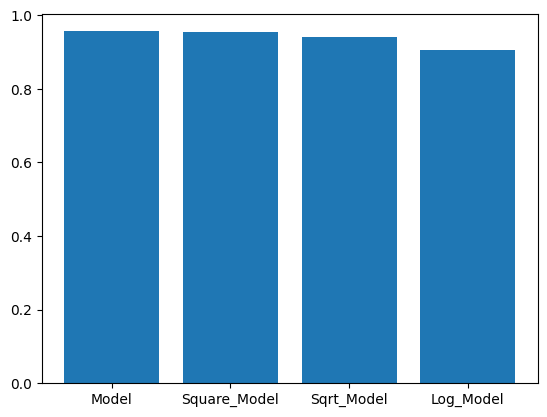

In [36]:
plt.bar(df2['Prep_Models'],df2['Rsquared'])

CONCLUSION:

- accuracy or r2 --> no transformation > square >sqrt > log transform
- HENCE FINAL MODEL CONTTAIN NO TRANFORAMTION


In [37]:
final_model=model

<Axes: xlabel='YearsExperience', ylabel='Salary'>

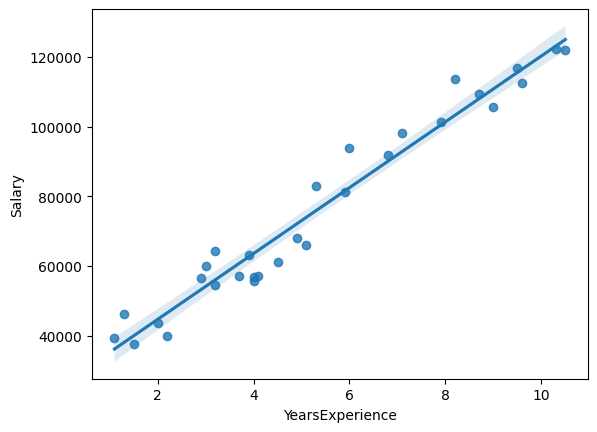

In [38]:
#visualizing regression
sns.regplot(y='Salary',x='YearsExperience',data=salary)